# Demonstration of Polynomial fit

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 15 November 2018**  
**Project Github:** https://github.com/joyfuldahye/MFCVML_Assignments/tree/master/Assignment07  

**Requirements** 

* A set of data $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ is generated by the python code assignment07.py  
* Define a model $\hat{f}(x) = \theta_0x^0+\theta_1x^1+...+\theta_px^p+$ by the polynomial function with model parameters $(\theta_0,\theta_1,...,\theta_p)$  
* Find an optimal set of model parameters that provide the least square approximate solution


**Essential Visualisation: Line Fitting**

* Plot the clean data $(x,y_1)$
* Plot the noisy data $(x,y_2)$
* Plot the polynomial curves that fit the noisy data by the least square error with varying $p = 0,1,2,3,...,9$  
* Plot the error $\sum_{j=1}^{n}r_j^2$ where $r_j = y_j - \hat{f}(x_j)$ is the residual with varying $p = 0,1,2,3,...,9$

-----------------------------------------------------------------------

## Import labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create clean and noisy data with given function

In [2]:
num     = 1001
std     = 5

# x  : x-coordinate data
# y1 : (clean) y-coordinate data
# y2 : (noisy) y-coordinate data 


def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)

y1      = fun(x)
y2      = y1 + nn * std

x_0 = np.ones(num)



## Compute the coefficient vector with each $p$:  
* Coefficient: $\hat{\theta} = (X^TX)^{-1}X^Ty$  

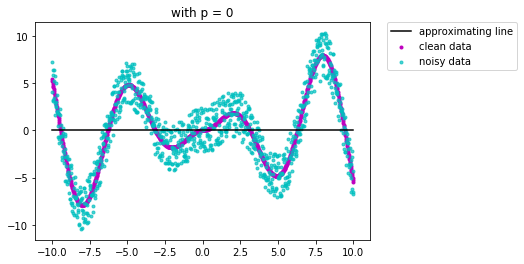

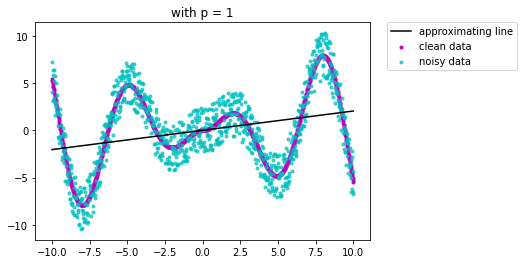

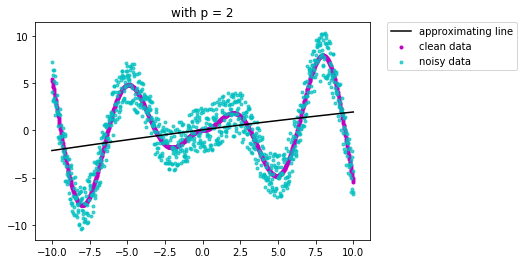

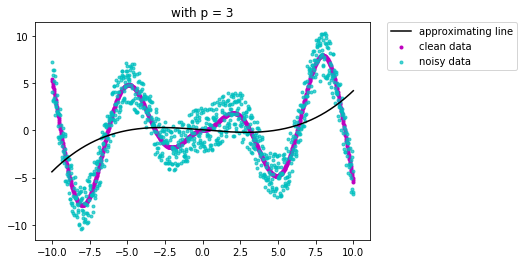

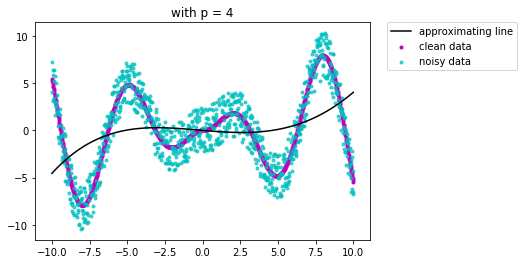

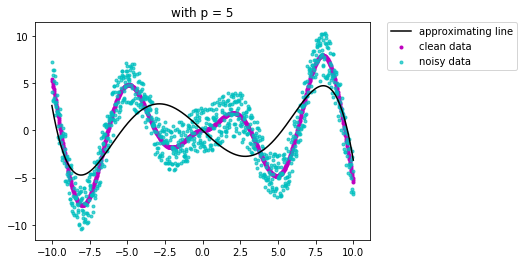

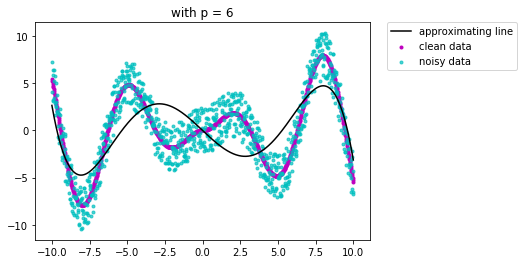

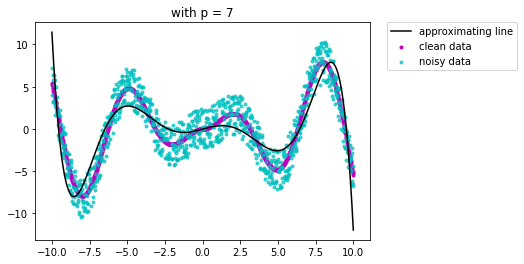

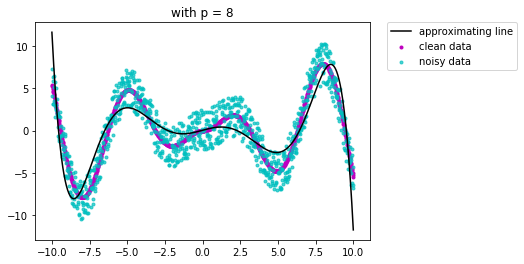

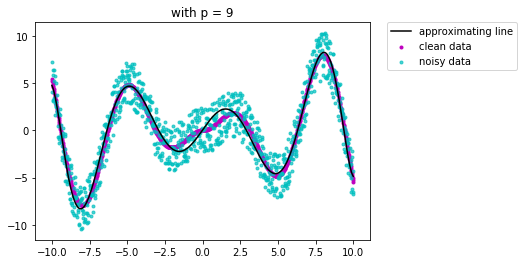

In [3]:
# initialize dict where to contain result of prediction with each p
predict_dict = {}

for p in range(10):
    
    # deal with the case when p == 0
    if p == 0:
        x_list = [x_0]
        x_nlist = np.array(x_list).reshape(p+1,1001)
        x_nlist = np.array(x_list).reshape(p+1,1001)
        x_features = np.transpose(x_nlist)
        x_features_transpose = np.transpose(x_features)
        x_features_gram = x_features_transpose.dot(x_features)
        x_features_gram_inverse = np.linalg.inv(x_features_gram)
        xy_moment = x_features_transpose.dot(y2)
        thetha_d = x_features_gram_inverse.dot(xy_moment)
        
    else:
        x_list = [x_0]
        for i in range(p):
            x_prev = x_list[i]
            x_next = x_prev * x
            x_list.append(x_next)

        x_nlist = np.array(x_list).reshape(p+1,1001)
        x_nlist = np.array(x_list).reshape(p+1,1001)
        x_features = np.transpose(x_nlist)
        x_features_transpose = np.transpose(x_features)
        x_features_gram = x_features_transpose.dot(x_features)
        x_features_gram_inverse = np.linalg.inv(x_features_gram)
        xy_moment = x_features_transpose.dot(y2)
        thetha_d = x_features_gram_inverse.dot(xy_moment)

    # compute prediction with coefficients calculated above
    y = 0
    for j in range(p+1):
        y += x_features[:,j] * thetha_d[j]
    predict_dict[p] = y

    
    # plot approximating curve with each p
    plt.figure(p)
    plt.title(f'with p = {p}')
    plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "clean data")
    plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "noisy data")
    
    plt.plot(x, y, 'k-', label = "approximating line")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plot the error $\sum_{j=1}^{n}r_j^2$ where $r_j = y_j - \hat{f}(x_j)$ is the residual with varying $p = 0,1,2,3,...,9$

17508.602901127844
16119.720732186555
16117.598095198846
15387.866968512386
15384.675884260672
10565.636094761154
10565.612853822975
5080.783134340646
5078.4417554750935
2339.6236306713963


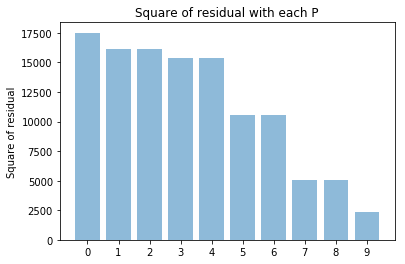

In [4]:
r_square_list = []
for k in range(10):
    r_square = (predict_dict[k]-y2)**2
    r_square_sum = np.sum(r_square)
    print(r_square_sum)
    r_square_list.append(r_square_sum)

label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pos = np.arange(len(label))
plt.bar(y_pos, r_square_list, align='center', alpha=0.5)
plt.xticks(y_pos, label)
plt.ylabel('Square of residual')
plt.title('Square of residual with each P')
plt.show()

## Plot the $rms = \sqrt{\frac{\sum_{j=1}^{n}r_j^2}{n}}$ where $r_j = y_j - \hat{f}(x_j)$ is the residual with varying $p = 0,1,2,3,...,9$

3.3529602125645863
3.2880297610780027
3.2875353472111124
3.1872389665277634
3.1869393296431285
2.7358071504380073
2.7357653297399707
1.832069625191718
1.832871691479979
1.2982293231343731


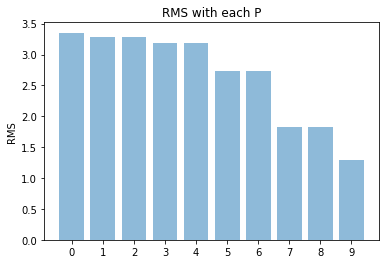

In [5]:
rms_list = []
for k in range(10):
    r_square = (predict_dict[k]-y2)**2
    r_sqrt = np.sqrt(r_square)
    r_sqrt_sum = np.sum(r_sqrt)
    rms = r_sqrt_sum/num
    print(rms)
    rms_list.append(rms)

label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pos = np.arange(len(label))
plt.bar(y_pos, rms_list, align='center', alpha=0.5)
plt.xticks(y_pos, label)
plt.ylabel('RMS')
plt.title('RMS with each P')
plt.show()

> $Error$ and $rms$ have become smaller as the $p$ gets larger. Compared to when $p$ is $0~4$, when $p = 9$ they drastically decrease. One interesting figure is that $p = 1$ shows a similar feature with $p = 2$. Likewise, $p = 3$, $p = 5$, $p = 7$ are respectively similar with $p = 4$, $p = 6$, $p = 8$.

### Additional attachment  
To make suare that the code implemented above is correct, I did experiment with data of 2 order polynomial function. The result proves that when the code above successfully figures out the 2 order polynomial prediction.

1
[-3.    -2.994 -2.988] [103.50851325 103.5085009  103.50848855]


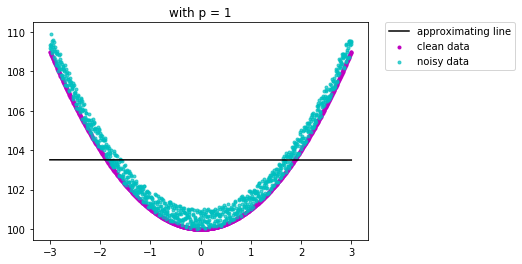

In [6]:
x = np.linspace(-3, 3, 1001)
y1 = x ** 2 + 100
y2 = y1 +  np.random.rand(1001)

p = 1
# x_list = [x_0]
# for i in range(p):
#     x_prev = x_list[i]
#     x_next = x_prev * x
#     x_list.append(x_next)

x_list = []
for i in range(p + 1):
    x_list.append(x ** i)

x_nlist = np.array(x_list).reshape(p+1,1001)
x_nlist = np.array(x_list).reshape(p+1,1001)
x_features = np.transpose(x_nlist)
x_features_transpose = np.transpose(x_features)
x_features_gram = x_features_transpose.dot(x_features)
x_features_gram_inverse = np.linalg.inv(x_features_gram)
xy_moment = x_features_transpose.dot(y2)
thetha_d = x_features_gram_inverse.dot(xy_moment)

y = 0
print(p)
plt.figure(p)
plt.title(f'with p = {p}')
plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "clean data")
plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "noisy data")

# for j in range(p+1):
#     y += x_features[:,j] * thetha_d[j]
y = np.dot(x_features, thetha_d)

plt.plot(x, y, 'k-', label = "approximating line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print(x[:3], y[:3])

2
[-3.    -2.994 -2.988] [109.49222391 109.45625451 109.42035717]


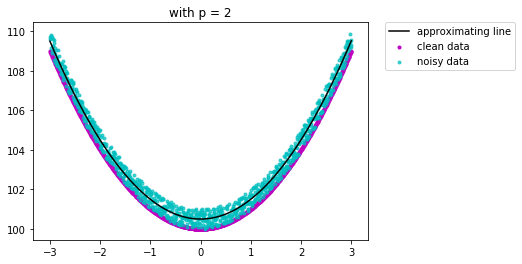

In [7]:
x = np.linspace(-3, 3, 1001)
y1 = x ** 2 + 100
y2 = y1 +  np.random.rand(1001)

p = 2
# x_list = [x_0]
# for i in range(p):
#     x_prev = x_list[i]
#     x_next = x_prev * x
#     x_list.append(x_next)

x_list = []
for i in range(p + 1):
    x_list.append(x ** i)

x_nlist = np.array(x_list).reshape(p+1,1001)
x_nlist = np.array(x_list).reshape(p+1,1001)
x_features = np.transpose(x_nlist)
x_features_transpose = np.transpose(x_features)
x_features_gram = x_features_transpose.dot(x_features)
x_features_gram_inverse = np.linalg.inv(x_features_gram)
xy_moment = x_features_transpose.dot(y2)
thetha_d = x_features_gram_inverse.dot(xy_moment)

y = 0
print(p)
plt.figure(p)
plt.title(f'with p = {p}')
plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "clean data")
plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "noisy data")

# for j in range(p+1):
#     y += x_features[:,j] * thetha_d[j]
y = np.dot(x_features, thetha_d)

plt.plot(x, y, 'k-', label = "approximating line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print(x[:3], y[:3])